# Final Project

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library ('tidyverse')
library ('patchwork')
library ('scales')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
covid_data = read_csv ("https://covidtracking.com/data/download/all-states-history.csv")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 20780 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): state
dbl  (37): death, deathConfirmed, deathIncrease, deathProbable, hospitalized...
lgl   (2): negativeTestsPeopleAntibody, positiveTestsPeopleAntibody
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
covid_data |> head()

date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,⋯,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-03-07,AK,305,NA,0,NA,1293,1293,33,0,⋯,1731628,0,NA,NA,NA,NA,NA,0,1731628,0
2021-03-07,AL,10148,7963,-1,2185,45976,45976,494,0,⋯,2323788,2347,NA,NA,119757,NA,2323788,2347,NA,0
2021-03-07,AR,5319,4308,22,1011,14926,14926,335,11,⋯,2736442,3380,NA,NA,NA,481311,NA,0,2736442,3380
2021-03-07,AS,0,NA,0,NA,NA,NA,NA,0,⋯,2140,0,NA,NA,NA,NA,NA,0,2140,0
2021-03-07,AZ,16328,14403,5,1925,57907,57907,963,44,⋯,7908105,45110,580569,NA,444089,NA,3842945,14856,7908105,45110
2021-03-07,CA,54124,NA,258,NA,NA,NA,4291,0,⋯,49646014,133186,NA,NA,NA,NA,NA,0,49646014,133186


In [10]:
covid_new = covid_data |>
    group_by(state)

covid_new |> head()

date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,⋯,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-03-07,AK,305,NA,0,NA,1293,1293,33,0,⋯,1731628,0,NA,NA,NA,NA,NA,0,1731628,0
2021-03-07,AL,10148,7963,-1,2185,45976,45976,494,0,⋯,2323788,2347,NA,NA,119757,NA,2323788,2347,NA,0
2021-03-07,AR,5319,4308,22,1011,14926,14926,335,11,⋯,2736442,3380,NA,NA,NA,481311,NA,0,2736442,3380
2021-03-07,AS,0,NA,0,NA,NA,NA,NA,0,⋯,2140,0,NA,NA,NA,NA,NA,0,2140,0
2021-03-07,AZ,16328,14403,5,1925,57907,57907,963,44,⋯,7908105,45110,580569,NA,444089,NA,3842945,14856,7908105,45110
2021-03-07,CA,54124,NA,258,NA,NA,NA,4291,0,⋯,49646014,133186,NA,NA,NA,NA,NA,0,49646014,133186


**By taking the raw data and cleaning it out to create this new dataset, we have grouped the data points by each state to see the results corresponding with each group. This is helpful to be able to see each data point that corresponds with each state in order to draw conclusions on each group.**

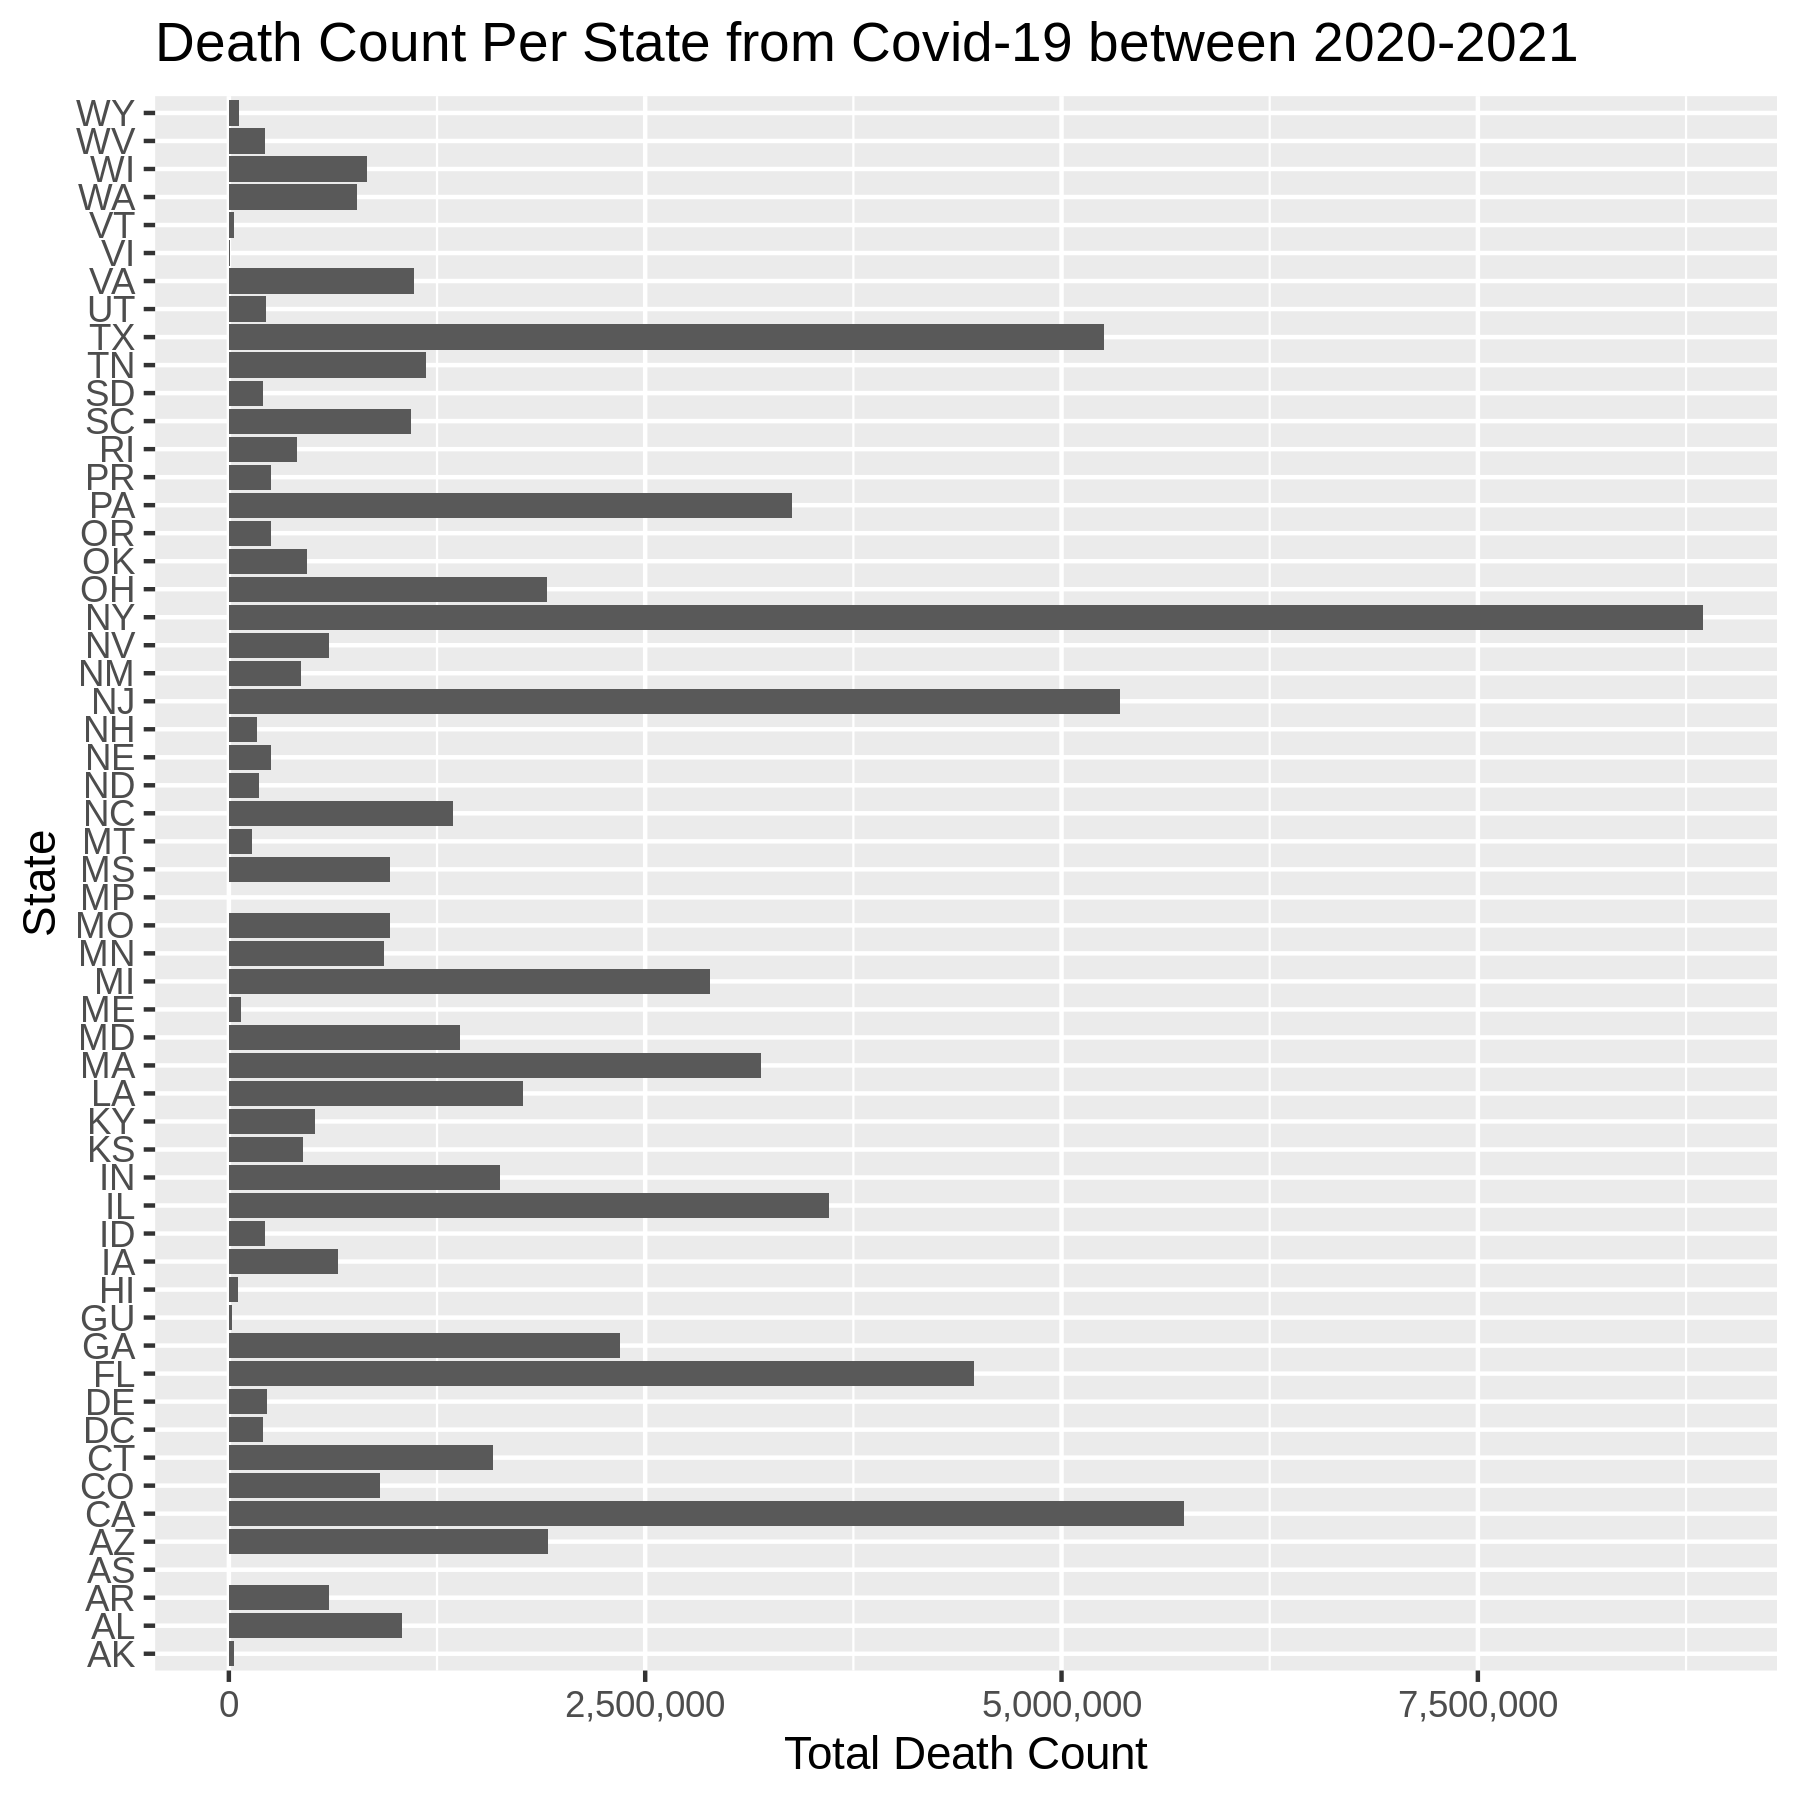

In [12]:
options (repr.plot.width = 6, repr.plot.height = 6) 
p = ggplot (covid_new, aes (x=state, weight=death)) + geom_bar() + labs(title = 'Death Count Per State from Covid-19 between 2020-2021') + 
labs(x = 'State', y = 'Total Death Count') + coord_flip() + scale_y_continuous (labels=scales::comma)
p

**This first analysis helps the researcher understand where each state falls in relation to the amount of deaths from COVID-19 from 2020-2021. This bar chart shows the total deaths reported in each state specifically. We can see that New York, California and New Jersey had the largest amount of deaths from Covid-19 reported.**

In [15]:
df_NJ = covid_new |>
    filter (date>= '2021-01-01', state %in% c('NJ')) |>
    group_by(date) |>
    summarize (hospitalizedCumulative)

df_NJ |> head()

date,hospitalizedCumulative
<date>,<dbl>
2021-01-01,48572
2021-01-02,48636
2021-01-03,48743
2021-01-04,48770
2021-01-05,49058
2021-01-06,49324


**With this manipulation, we can filter the data to only show dates after January 1, 2021 in New Jersey of the cumulative amount of those hospitalized in this timeframe.**

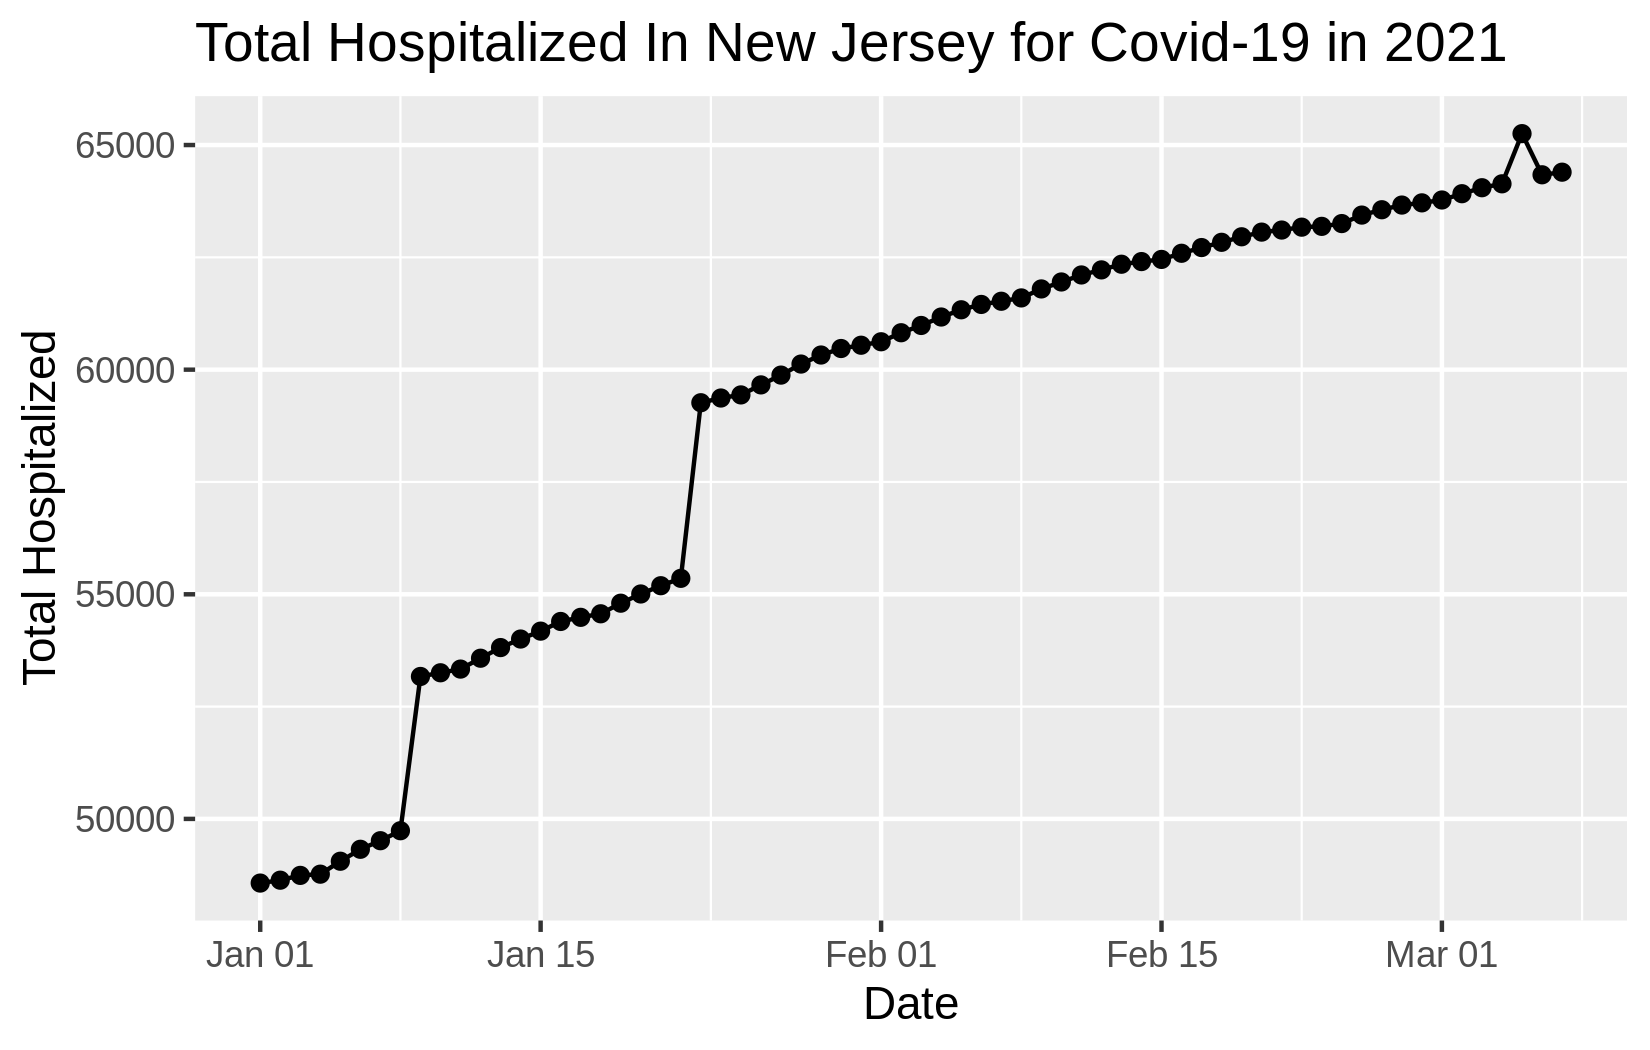

In [27]:
options (repr.plot.width = 5.5, repr.plot.height = 3.5) 
p = ggplot (df_NJ, aes (x=date, y=hospitalizedCumulative)) + geom_line() +
geom_point() + labs(title = 'Total Hospitalized In New Jersey for Covid-19 in 2021') + 
labs(x = 'Date', y = 'Total Hospitalized')
p

**Manipulation of the data was needed in order to see the total amount of those hospitalized in New Jersey specifically after a certain date. From this chart, we can see that the number hospitalized in New Jersey continued to rapidly increase in 2021, which one can assume was due to the infectious variant at the time and better testing available. The spikes in hospitalization correspond with the spikes in variant presence at the time, showing the burden of this illness on the healthcare system at certain times.**

In [17]:
totalcovid = covid_new |>
    group_by(date, state) |>
    filter (date>= '2021-01-01') |>
    summarize (confirmed.deaths = sum(deathConfirmed))

totalcovid |> head()

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


date,state,confirmed.deaths
<date>,<chr>,<dbl>
2021-01-01,AK,206
2021-01-01,AL,4254
2021-01-01,AR,3106
2021-01-01,AS,NA
2021-01-01,AZ,8128
2021-01-01,CA,NA


**With this manipulation, we are able to see the confirmed deaths for each state for all dates after January 1, 2021.**

Warning message:
“Removed 1771 rows containing missing values (`geom_line()`).”


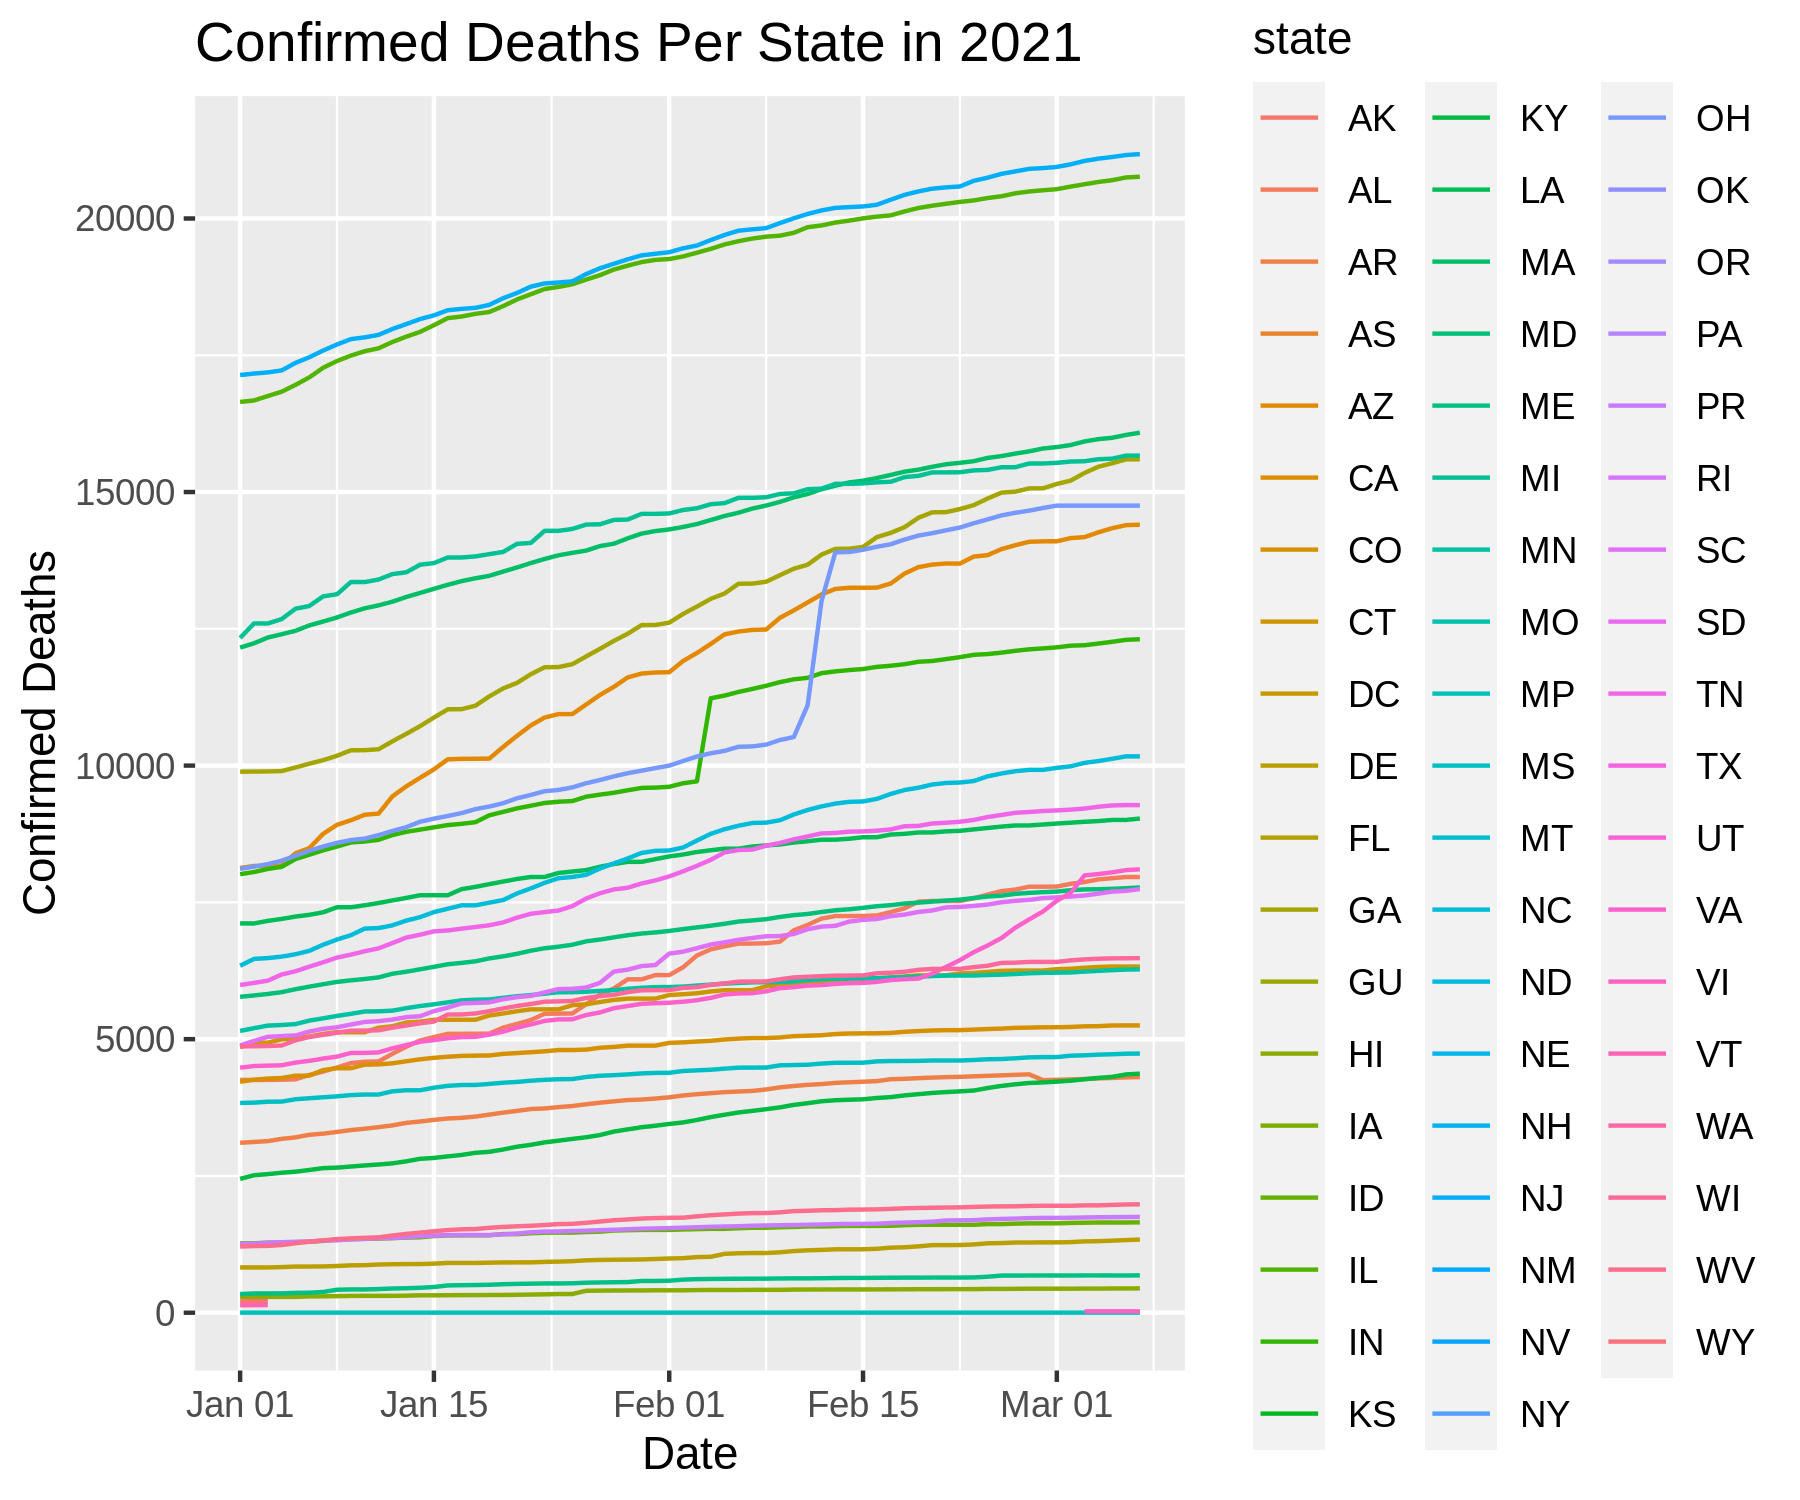

In [29]:
options (repr.plot.width = 6, repr.plot.height = 5) 
p = ggplot(totalcovid, aes(x=date, y=confirmed.deaths, color=state)) + geom_line() +
labs(title = 'Confirmed Deaths Per State in 2021') + 
labs(x = 'Date', y = 'Confirmed Deaths')
p

**By manipulating the data to identify the confirmed deaths per state in the months of January, February and March of 2021 can allow us to see the drastic changes in each state in comparison to one another based on the deaths reported for this critical time period in COVID-19. We can see some states remained at a constant rate, while others had spikes or drastic increase in deaths at different time periods. This can help researchers understand which states faced a higher burden with deaths than others and what might have caused these differences.**